# Assignment 4: Optimizing Logistic Regression

In [6]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

## Part 1. Build DataFrame and Define ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the "cell2celltrain" data set. This version of the data set has been preprocessed and is ready for modeling.

In [7]:
filename = os.path.join(os.getcwd(), "..", "..", "data", "cell2celltrain.csv")

In [8]:
df = pd.read_csv(filename)

#### Define the Label

This is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

To implement a Logistic Regression model, we must use only the numeric columns. 

In [9]:
feature_list = df.select_dtypes("float64")
feature_list

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,-0.782676,-0.578738,-1.041153,-0.289532,-0.414422,-0.125914,-0.564836,-0.449987,-0.587303,-0.309284,...,0.487071,-0.077013,1.387766,-0.883541,4.662897,-0.128300,-0.169283,-0.103411,-0.140707,-0.864858
1,-0.940180,-0.973177,-1.250809,-0.401714,-0.414422,-0.125914,0.029311,0.030120,-0.631532,-0.373230,...,-0.616775,3.019920,0.392039,0.871495,-0.180167,-0.128300,-0.169283,0.215243,-0.140707,-0.864858
2,-0.468118,-0.976952,-0.370255,-0.401714,-0.414422,-0.125914,0.037077,0.030120,-0.664703,-0.373230,...,-0.616775,3.019920,-0.241605,0.202910,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-0.368174
3,0.526784,1.484048,1.181196,0.154708,-0.414422,-0.125914,0.654524,0.234797,4.012499,0.330172,...,2.694763,0.305179,-0.060564,-0.883541,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-1.195980
4,-0.936810,-0.992050,-1.250809,-0.401714,-0.414422,-0.125914,0.044844,0.025066,-0.664703,-0.373230,...,1.590917,1.857585,0.663601,1.372934,-0.180167,-0.128300,-0.169283,1.489856,2.469282,-1.195980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,-0.233099,-0.301309,-0.076738,-0.289532,-0.383361,-0.125914,0.025428,0.022539,0.363618,-0.126582,...,0.487071,0.573107,1.659328,1.790800,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-0.368174
51043,0.816402,2.301236,1.600507,0.042526,0.051479,0.352789,0.518608,0.431894,1.181852,-0.309284,...,0.487071,0.328819,0.754122,1.122214,-0.180167,-0.128300,-0.169283,1.489856,2.469282,-0.368174
51044,-0.233099,-0.301309,-0.076738,-0.289532,-0.383361,-0.125914,0.025428,0.022539,4.012499,0.019579,...,0.487071,-0.010031,0.210998,-0.883541,-0.180167,-0.128300,-0.169283,0.852549,2.469282,-0.037051
51045,-0.233099,-0.301309,-0.076738,-0.289532,-0.383361,-0.125914,0.025428,0.022539,-0.664703,-0.373230,...,0.487071,0.206676,0.029957,-0.883541,-0.180167,-0.128300,-0.169283,1.489856,-0.140707,-0.864858


## Part 2. Create Labeled Examples from the Data Set 

Our data is fully prepared for modeling. We can now create labeled examples from DataFrame `df`.

In [10]:
X = feature_list
y = df["Churn"]
X.shape

(51047, 35)

## Part 3. Create Training and Test Data Sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35732, 35) (15315, 35) (35732,) (15315,)


## Part 4. Train a Logistic Regression Classifier and Evaluate the Model

In [13]:
def train_test_LR(X_train, y_train, X_test, y_test, c):
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
    
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    probability_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, probability_predictions)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return l_loss, acc_score
    
    

### Train a Model and Analyze the Results

In [14]:
print(train_test_LR(X_train, y_train, X_test, y_test, c=1))

(0.5888245245694671, 0.7091087169441724)


## Part 5. Train on Different Hyperparameter Values and Analyze the Results

Now we will adjust the $C$ regularization hyperparameter to check its impact on the model's log loss and accuracy. Hyperparameter `C` stands for the inverse of regularization strength. Smaller values specify stronger regularization and a simpler model. Larger values specify weaker regularization and a more complex model.<br>

The code cell below creates a list `cs` of twenty values of $C$.  Every item in the list has a value $10^i$ for every integer $i$ in the output of `range(-10,10)`.

In [15]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

In [16]:
acc_list = []
l_loss_list = []

for c in cs:
    l_loss, acc = train_test_LR(X_train, y_train, X_test, y_test, c)
    print(l_loss, acc, c)
    acc_list.append(acc)
    l_loss_list.append(l_loss)

0.6025052141784704 0.7096310806398956 1e-10
0.6025052443755019 0.7096310806398956 1e-09
0.6025026676667322 0.7096310806398956 1e-08
0.6024783010680961 0.7096310806398956 1e-07
0.6022451031459269 0.7096310806398956 1e-06
0.6004821799352992 0.7096310806398956 1e-05
0.5945179250206694 0.7096310806398956 0.0001
0.5891395121584165 0.7100228534116879 0.001
0.5886355981178039 0.7088475350963108 0.01
0.5888009831065725 0.7091087169441724 0.1
0.5888245245694671 0.7091087169441724 1
0.5888269625113687 0.7091087169441724 10
0.588827207159754 0.7091087169441724 100
0.588827231633151 0.7091087169441724 1000
0.5888272340805764 0.7091087169441724 10000
0.5888272343253196 0.7091087169441724 100000
0.588827234349794 0.7091087169441724 1000000
0.5888272343522415 0.7091087169441724 10000000
0.5888272343524862 0.7091087169441724 100000000
0.5888272343525107 0.7091087169441724 1000000000


Now let's visualize the results. 

Before we create plots, let's reformat the hyperparameter values in list `cs` so that they can be easily visualized in our plots. We will take the log 10 of the hyperparameter values and save it to a new list called `cs_log10`. Let's take a look at the original values and transformed values:
 

In [17]:
cs_log10 = np.log10(cs)

print(cs)
print(cs_log10)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]



#### Plot Log Loss

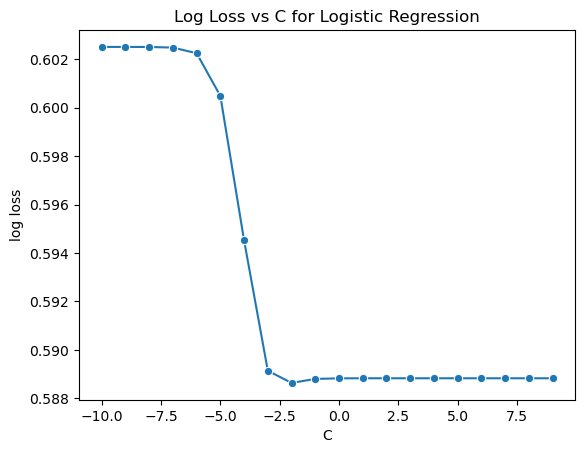

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

p = sns.lineplot(x=cs_log10, y=l_loss_list, marker='o')

plt.title('Log Loss vs C for Logistic Regression')
ax.set_xlabel('C')
ax.set_ylabel('log loss')
plt.show()

#### Plot Accuracy

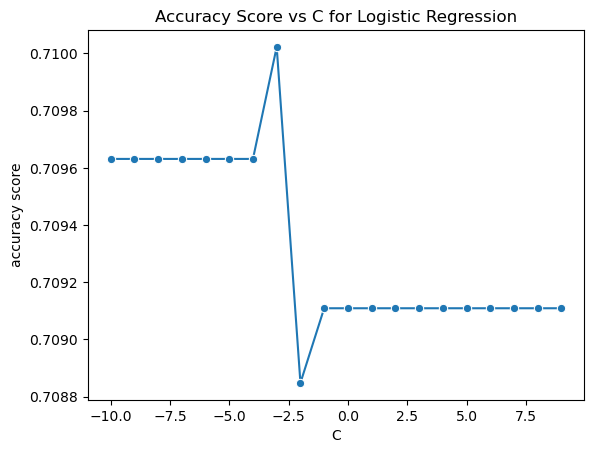

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

p = sns.lineplot(x=cs_log10, y=acc_list, marker='o')

plt.title('Accuracy Score vs C for Logistic Regression')
ax.set_xlabel('C')
ax.set_ylabel('accuracy score')
plt.show()